In [1]:
import pickle
import os 

model_path = os.path.join(os.getcwd(), "direct_mlmodels_dict_['ID_SEGMENT', 'MES', 'COD_LABORALIDAD'][15, 60, 120].sav")
ml_test = pickle.load( open(model_path, "rb" ) ) 

In [2]:
ml_test

{'linear_regression': {'is_active': True,
  'train_model': True,
  'method': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False),
  '(1.0, 8.0, 4.0)_15': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False),
  '(1.0, 8.0, 4.0)_60': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False),
  '(1.0, 8.0, 4.0)_120': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False),
  '(1.0, 8.0, 2.0)_15': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False),
  '(1.0, 8.0, 2.0)_60': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False),
  '(1.0, 8.0, 2.0)_120': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False),
  '(1.0, 8.0, 6.0)_15': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False),
  '(1.0, 8.0, 6.0

In [3]:
ml_test['linear_regression']

{'is_active': True,
 'train_model': True,
 'method': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False),
 '(1.0, 8.0, 4.0)_15': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False),
 '(1.0, 8.0, 4.0)_60': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False),
 '(1.0, 8.0, 4.0)_120': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False),
 '(1.0, 8.0, 2.0)_15': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False),
 '(1.0, 8.0, 2.0)_60': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False),
 '(1.0, 8.0, 2.0)_120': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False),
 '(1.0, 8.0, 6.0)_15': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False),
 '(1.0, 8.0, 6.0)_60': LinearRegression(copy_X=True, fit

In [34]:
import pandas as pd
train_data = pd.read_csv('C:\\Users\\yhoz\\Documents\\dataanalytics.predictive\\data\\norte_litoral\\anual_data_18.csv', delimiter=";")
test_data = pd.read_csv('C:\\Users\\yhoz\\Documents\\dataanalytics.predictive\\data\\norte_litoral\\monthly\\02-19.csv', delimiter=";")

In [35]:
# Clean
train_data = train_data.drop_duplicates(['MES','FECHA', 'ID_SEGMENTO'], keep='first').fillna(method='ffill') # fill with the last value
train_data = train_data.dropna(how='all')
train_data.rename(columns={'ID_SEGMENTO': 'ID_SEGMENT'}, inplace=True)

# Add temporal features
train_data['TIME'] =pd.to_datetime(train_data['FECHA']).map(lambda x: x.strftime('%d %H:%M:%S'))
train_data.sort_values(by=['TIME'], inplace=True)
train_data['DIA']=pd.to_datetime(train_data['FECHA']).dt.day



# Clean
test_data = test_data.drop_duplicates(['MES','FECHA', 'ID_SEGMENT'], keep='first').fillna(method='ffill') # fill with the last value
test_data = test_data.dropna(how='all')

# Add temporal features
test_data['TIME'] =pd.to_datetime(test_data['FECHA']).map(lambda x: x.strftime('%d %H:%M:%S'))
test_data.sort_values(by=['TIME'], inplace=True)
test_data['DIA']=pd.to_datetime(test_data['FECHA']).dt.day




In [32]:
train_data = train_data.loc[(train_data['ID_SEGMENT']==1.0) & (train_data['MES']==1.0) & (train_data['COD_LABORALIDAD']==7.0)]
cols = train_data.columns.difference(['FECHA','ID_SEGMENT','ID_SEGMENT', 'MES', 'COD_LABORALIDAD', 'TIME']).tolist()
x_train = train_data[cols]


x_test_time = None
test_data = test_data.loc[(test_data['ID_SEGMENT']==1.0) & (test_data['MES']==2.0) & (test_data['COD_LABORALIDAD']==7.0)]

cols = test_data.columns.difference(['FECHA','ID_SEGMENT','ID_SEGMENT', 'MES', 'COD_LABORALIDAD', 'TIME']).tolist()
x_test = test_data[cols]

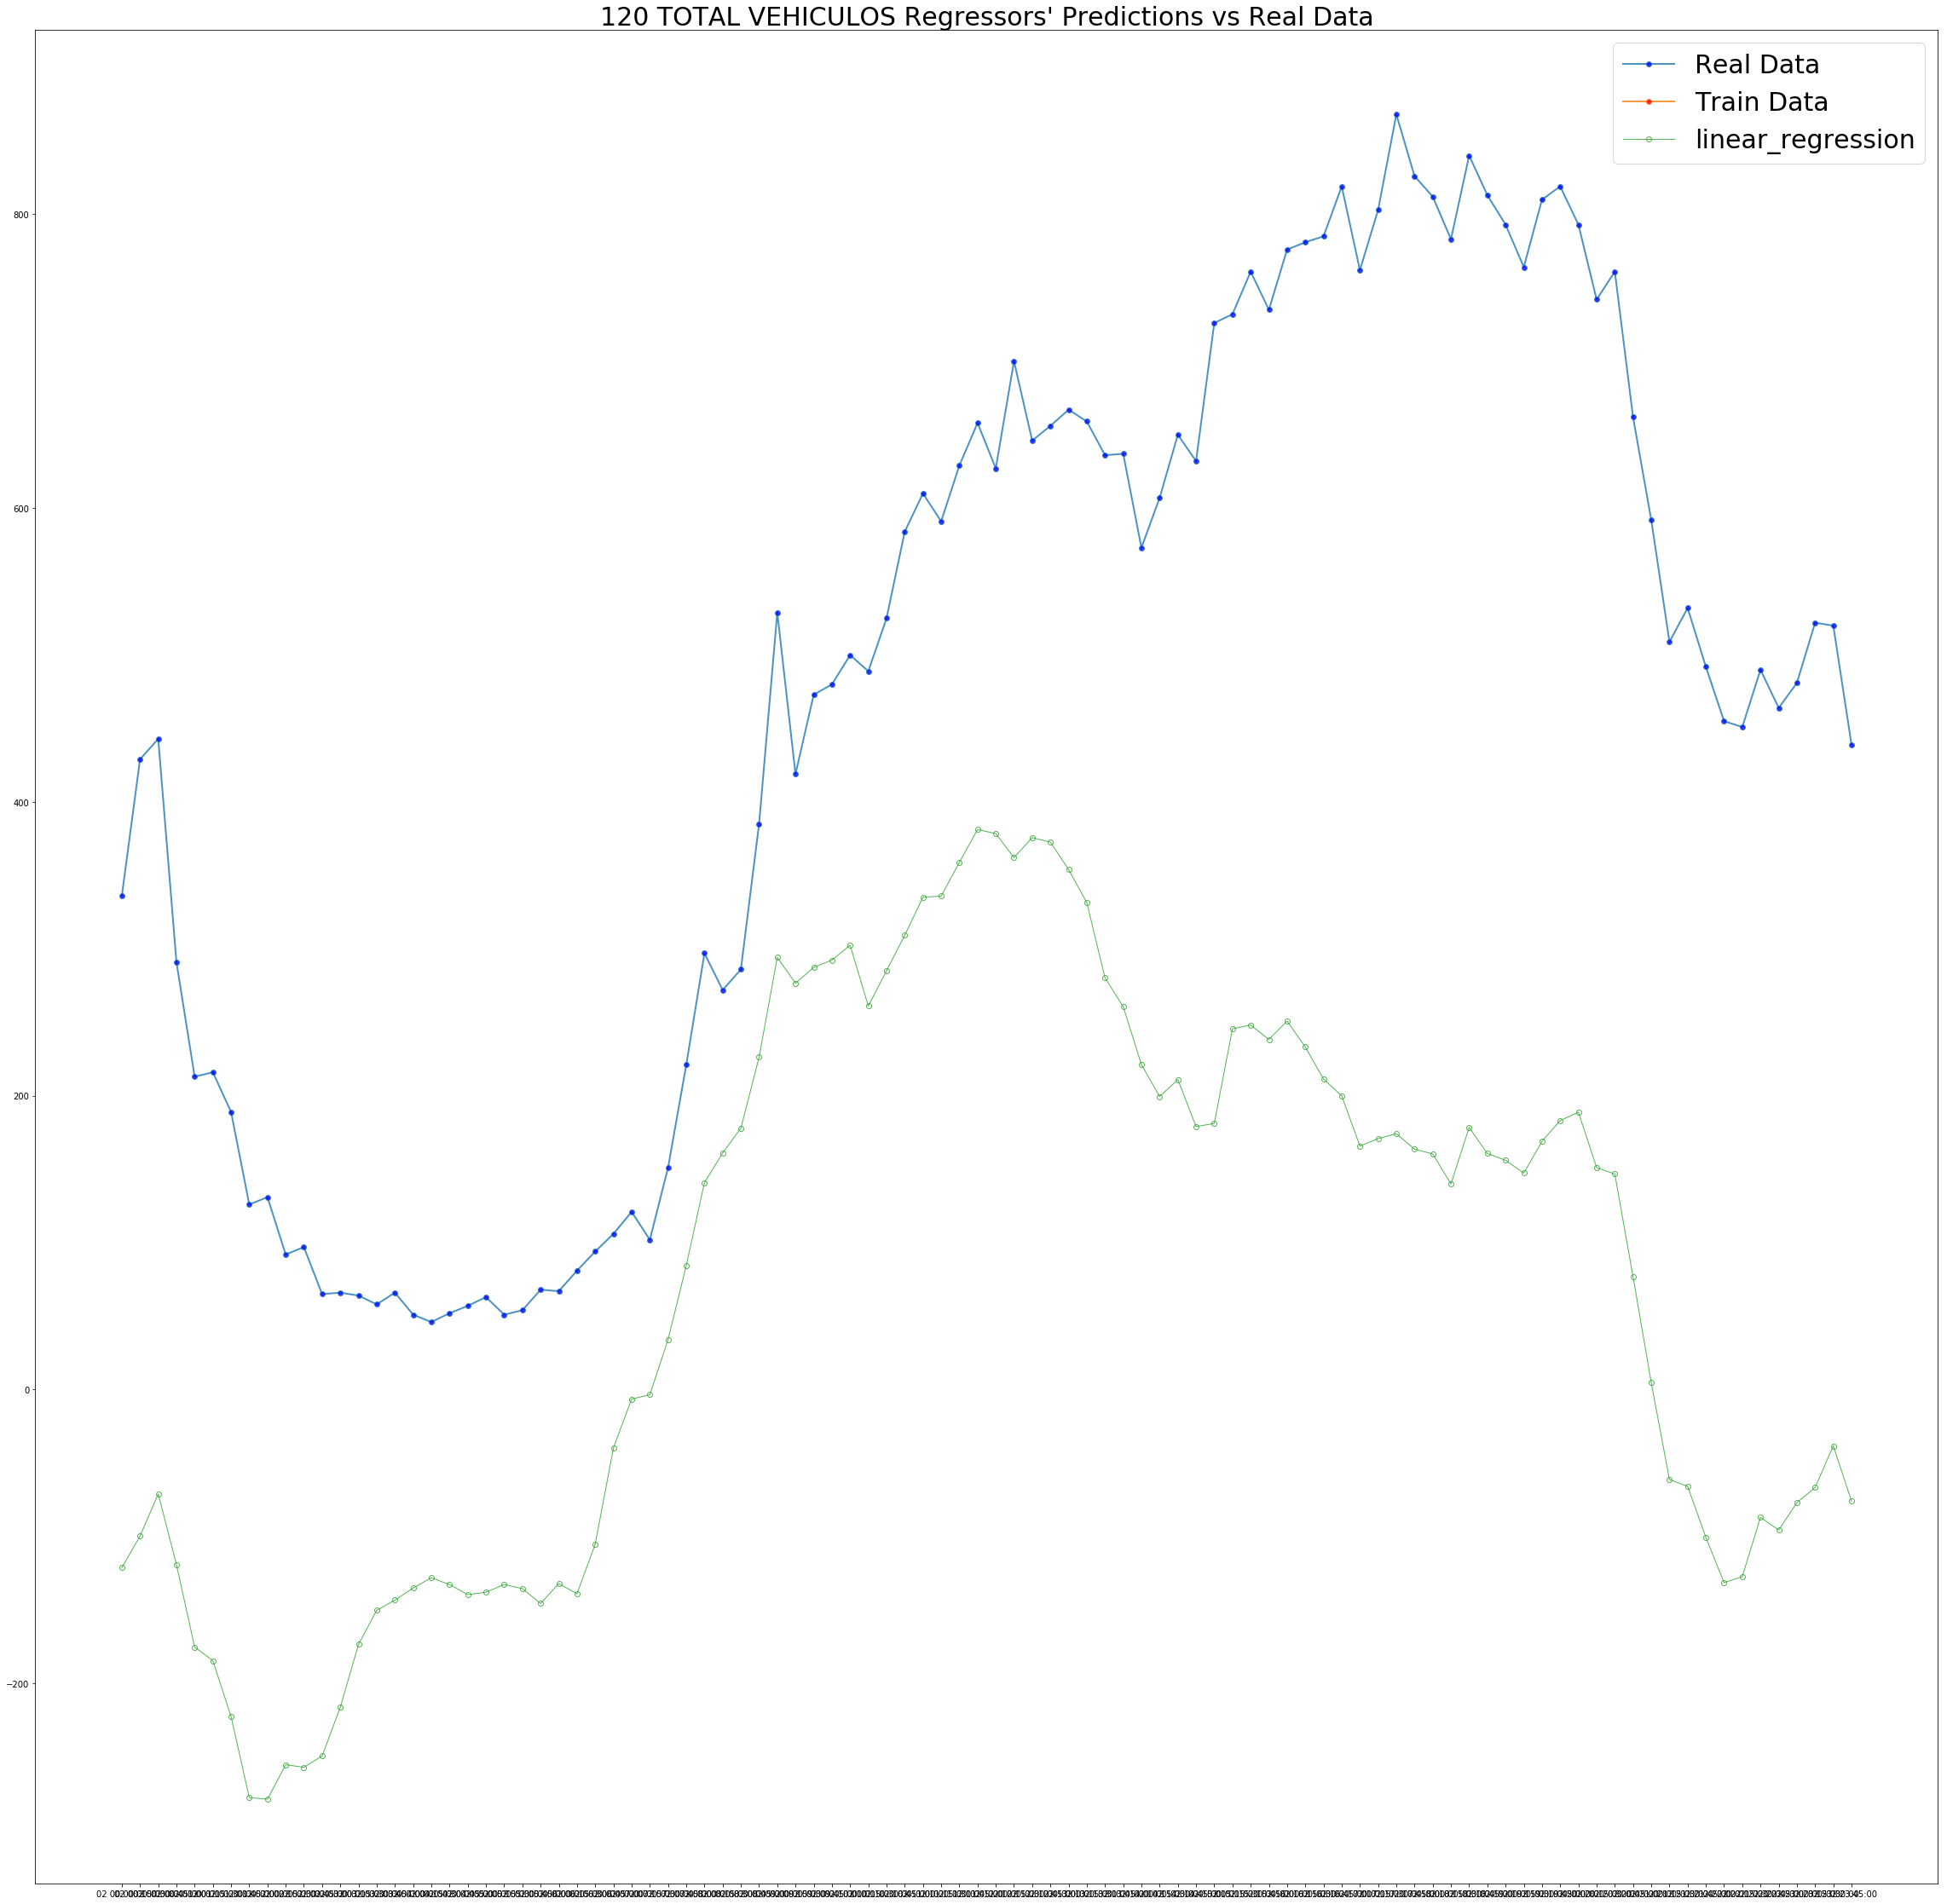

In [33]:
import matplotlib.pyplot as plt
regr_name = 'linear_regression' # cambiar esto !!!

#for horizon, values in forecast_horizon:   
plt.figure(figsize=(40,40))
plt.title("120 TOTAL VEHICULOS Regressors' Predictions vs Real Data" ,  fontsize=30)
y_test = x_test['TOTAL_VEHICULOS']
y_train = x_train['TOTAL_VEHICULOS']

plt.plot(test_data.TIME[0:96], y_test[0:96],'-o', markerfacecolor="blue", label='Real Data', linewidth=2, alpha=0.8)
plt.plot(train_data.TIME[0:96], y_train[0:96],'-o', markerfacecolor="red", label='Train Data', linewidth=2, alpha=0.8)

y_test_pred = ml_test[regr_name]['(1.0, 2.0, 2.0)_15'].predict(x_test)
plt.plot(test_data.TIME[0:96], y_test_pred[0:96],'-o',  markerfacecolor="None" , label=regr_name, linewidth=1, alpha=0.8)
plt.legend(loc='best',  fontsize=30)
plt.show()